##  <center><span style="color:darkgreen; font-size:3em;">Team ZM4</span>

#  <center><span style="color:darkgreen; font-size:1.3em;"> Unsupervised Predict - EDSA Movie Recommendation Challenge
</span>

<img src="https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/best-movies-1614634680.jpg" width="900" height="400" align="center"/>

## Table of Contents

1. <a href ="#1.-Overview">Overview</a>
2. <a href ="#2.-Problem-identification">Problem Identifiaction</a>
3. <a href ="#3.-Introduction">Introduction</a>
4. <a href ="#4.-Importing-packages">Importing Packages</a>
5. <a href ="#5.-Loading-data">Loading data</a>
6. <a href ="#6.-Exploratory-Data-Analysis">Exploratory Data Analysis</a>
7. <a href ="#7.-Building-Models">Building Models</a>  
   7.1 <a href ="#7.1.-Content-based-filtering-recommender-system">Content based filtering recommender system</a>           
   7.2 <a href ="#7.2.-SVD-Model">SVD Model</a>      
   7.3 <a href ="#7.3.-BaselineOnly-Model">BaselineOnly Model</a>      
   7.4 <a href ="#7.4.-NMF-Non-negative-Matrix-Factorization-Model">NMF</a>     
   7.5 <a href ="#7.5.-SlopeOne">SlopeOne</a>     
   7.6 <a href ="#7.6.-Co-Clustering">Co-Clustering</a>   
   7.7 <a href ="#7.7.-Hyper-parametertuning-on-best-models-(SVD)">Hyper parametertuning on best models (SVD) - the one we submitted on Kaggle</a>   
   7.8 <a href ="#7.8.-Collaborative-based-recommender">Collaborative based recommender</a>    
8. <a href ="#8.-Conclusion">Conclusion</a>


     
  
   
   

# 1. Overview

This notebook has a dataset that consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.

You can find the project overview [here](https://www.kaggle.com/c/edsa-movie-recommendation-challenge/overview).

[<a href ="#Table-of-Contents">Back to table of contents</a>]

# 2. Problem identification

### <center> Challenge: EDSA Movie Recommendation 


**Team ZM4** was challenged by EDSA(Explore Data Science Academy), with the task of constructing a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity. They are called "Unsupervised", because users do not need to supervise the model. Instead, it allows the model to work on its own to discover patterns and information that was previously undetected


[<a href ="#Table-of-Contents">Back to table of contents</a>]

# 3. Introduction

“What movies should I check out tonight?” 

Recommender systems help users select similar items when something is being chosen online. There are several companies that actually use these systems, as such the biggest companies such Netflix or Amazon would suggest to the users movies that might interest. Other companies such as Yelp use recommender systems to suggest different resturants and services. The main point to use these systems is to reach out to users by provider best customer services and improve customer satisfaction.

The current recommendation systems that are being used and are popular are the content-based filtering and collaborative filtering which works by implementing different information sources to make the recommendations.

- **Content-based filtering (CBF)** : makes recommendations based on user preferences for product features.
- **Collaborative filtering (CF)**: mimics user-to-user recommendations (i.e. it relies on how other users have responded to the same items). It predicts users preferences as a linear, weighted combination of other user preferences.

We have to note that both of these methods have **limitations**: The CBF can recommend a new item but needs more data on user preferences to give out the best match. On the other hand, the CF requires large dataset with active users who rated the product before to make the most accurate predictions. The combination of both of these methods is known as hybrid recommendation systems.


_Let’s get you the best movie!_



[<a href ="#Table-of-Contents">Back to table of contents</a>]

# 4. Importing packages 


We will import all the libraries that we desire to work with throughout the entire notebook.


In [2]:
# data analysis libraries
# importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import math
import random
import pickle
import json
import matplotlib.pyplot as plt
import re
import warnings
#import plotly.graph_objs as go
from IPython.display import display_html 
from IPython.core.display import HTML
import wordcloud
from wordcloud import WordCloud, STOPWORDS


[<a href ="#Table-of-Contents">Back to table of contents</a>]

# 5. Loading data


The `train` DataFrame below contains the main training data (`over 10 million rows`) while the `test` DataFrame (`over 5 million rows`) contains the data on which we have to predict the users' movie rating. Due to the size of the datasets they are all imported locally.


In [15]:
# Importing datasets that will be used for this project

train = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
df_movies = pd.read_csv("movies.csv")
df_samp = pd.read_csv("sample_submission.csv")
df_imdb = pd.read_csv("imdb_data.csv")
df_gtags = pd.read_csv("genome_tags.csv")
df_scores = pd.read_csv("genome_scores.csv")
df_tags = pd.read_csv("tags.csv")
df_links = pd.read_csv("links.csv")

[<a href ="#Table-of-Contents">Back to table of contents</a>]

## Joining Datasets


Now that we have a basic understanding of the data we are working with, we merge the sets below for more in depth analysis in the EDA section.


In [3]:
# Merge the ratings and movies
merged_dataset = train.merge(df_movies, on='movieId')
# Merging the dataset with that of the imbd
merged_dataset_2 = train.merge(df_imdb, on="movieId")
# Merging the merged_dataset with the df_imbd
merged_dataset_3 = merged_dataset.merge(df_imdb, on="movieId" )


In [4]:
data = merged_dataset['rating'].value_counts().sort_index(ascending=False)


In [42]:
merged_dataset_3.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


# 6. Exploratory Data Analysis


### Objective:

Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics. It is used to understand data, get some context regarding it, understand the variables and the relationships between them, and formulate hypotheses that could be useful when building predictive models.


### General analysis

#### Missing values

In our dataset, there may be some missing values. We cannot train our model with a dataset that contains missing values. So we have to check if our dataset has missing values.

The real-world dataset often has a lot of missing values. The cause of the presence of missing values in the dataset can be loss of information, disagreement in uploading the data, and many more. Missing values need to be imputed to proceed to the next step of the model development pipeline. Before imputing the missing values, it's important to understand the type of missing value present in the dataset.



In [5]:
#A function that displays multiple dataframes in one cell
def data_overview(dataframe_list,column_names=[]):
        
    """
    A function that allows us to display multiple
    dataframes in one cell.
    
    """
    
    html_string = ''
    html_string += ('<tr>' + ''.join(f'<td style="text-align:center">{name}</td>' for name in column_names) + '</tr>')
    html_string += ('<tr>' + ''.join(f'<td style="vertical-align:top"> {df.to_html(index=True)}</td>' for df in dataframe_list) + '</tr>')
    html_string = f'<table>{html_string}</table>'
    html_string = html_string.replace('table','table style="display:inline"')
    display_html(html_string, raw=True)  
    


In [24]:
#displays the overview of train,test,movies 
data_overview([train.head(),test_df.head(),df_links.head(),df_tags.head(),df_imdb.head(),df_movies.head(),df_gtags.head(),df_scores.head()], column_names=['Train','Test','Links','Tags','imdb','movies','Genom tags','Scores'])


Train Test Links Tags imdb movies Genom tags Scores 
 
 
 
 userId 
 movieId 
 rating 
 timestamp 
 
 
 
 
 0 
 5163 
 57669 
 4.0 
 1518349992 
 
 
 1 
 106343 
 5 
 4.5 
 1206238739 
 
 
 2 
 146790 
 5459 
 5.0 
 1076215539 
 
 
 3 
 106362 
 32296 
 2.0 
 1423042565 
 
 
 4 
 9041 
 366 
 3.0 
 833375837 
 
 
 
 
 
 
 userId 
 movieId 
 
 
 
 
 0 
 1 
 2011 
 
 
 1 
 1 
 4144 
 
 
 2 
 1 
 5767 
 
 
 3 
 1 
 6711 
 
 
 4 
 1 
 7318 
 
 
 
 
 
 
 movieId 
 imdbId 
 tmdbId 
 
 
 
 
 0 
 1 
 114709 
 862.0 
 
 
 1 
 2 
 113497 
 8844.0 
 
 
 2 
 3 
 113228 
 15602.0 
 
 
 3 
 4 
 114885 
 31357.0 
 
 
 4 
 5 
 113041 
 11862.0 
 
 
 
 
 
 
 userId 
 movieId 
 tag 
 timestamp 
 
 
 
 
 0 
 3 
 260 
 classic 
 1439472355 
 
 
 1 
 3 
 260 
 sci-fi 
 1439472256 
 
 
 2 
 4 
 1732 
 dark comedy 
 1573943598 
 
 
 3 
 4 
 1732 
 great dialogue 
 1573943604 
 
 
 4 
 4 
 7569 
 so bad it's good 
 1573943455 
 
 
 
 
 
 
 movieId 
 title_cast 
 director 
 runtime 
 budget 
 plot_keywords 
 
 
 
 
 0 
 1 
 Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette|Jack Angel|Spencer Aste 
 John Lasseter 
 81.0 
 $30,000,000 
 toy|rivalry|cowboy|cgi animation 
 
 
 1 
 2 
 Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup 
 Jonathan Hensleigh 
 104.0 
 $65,000,000 
 board game|adventurer|fight|game 
 
 
 2 
 3 
 Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Margret|Burgess Meredith|Daryl Hannah|Kevin Pollak|Katie Sagona|Ann Morgan Guilbert|James Andelin|Marcus Klemp|Max Wright|Cheryl Hawker|Wayne A. Evenson|Allison Levine 
 Mark Steven Johnson 
 101.0 
 $25,000,000 
 boat|lake|neighbor|rivalry 
 
 
 3 
 4 
 Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Mykelti Williamson|Michael Beach|Leon|Wendell Pierce|Donald Faison|Jeffrey D. Sams|Jazz Raycole|Brandon Hammond|Kenya Moore 
 Terry McMillan 
 124.0 
 $16,000,000 
 black american|husband wife relationship|betrayal|mother son relationship 
 
 
 4 
 5 
 Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Rebecca Chambers|April Ortiz|Dulcy Rogers|Kathy Anthony 
 Albert Hackett 
 106.0 
 $30,000,000 
 fatherhood|doberman|dog|mansion 
 
 
 
 
 
 
 movieId 
 title 
 genres 
 
 
 
 
 0 
 1 
 Toy Story (1995) 
 Adventure|Animation|Children|Comedy|Fantasy 
 
 
 1 
 2 
 Jumanji (1995) 
 Adventure|Children|Fantasy 
 
 
 2 
 3 
 Grumpier Old Men (1995) 
 Comedy|Romance 
 
 
 3 
 4 
 Waiting to Exhale (1995) 
 Comedy|Drama|Romance 
 
 
 4 
 5 
 Father of the Bride Part II (1995) 
 Comedy 
 
 
 
 
 
 
 tagId 
 tag 
 
 
 
 
 0 
 1 
 007 
 
 
 1 
 2 
 007 (series) 
 
 
 2 
 3 
 18th century 
 
 
 3 
 4 
 1920s 
 
 
 4 
 5 
 1930s 
 
 
 
 
 
 
 movieId 
 tagId 
 relevance 
 
 
 
 
 0 
 1 
 1 
 0.02875 
 
 
 1 
 1 
 2 
 0.02375 
 
 
 2 
 1 
 3 
 0.06250 
 
 
 3 
 1 
 4 
 0.07575 
 
 
 4 
 1 
 5 
 0.14075

In [37]:
#check for missing values
#Create the null-value dataframes of all the given datasets
train_null = pd.DataFrame({"Null Values":train.isnull().sum()})
test = pd.DataFrame({"Null Values":test_df.isnull().sum()})
movies = pd.DataFrame({"Null Values":df_movies.isnull().sum()})
links = pd.DataFrame({"Null Values":df_links.isnull().sum()})
imdb = pd.DataFrame({"Null Values":df_imdb.isnull().sum()})
tags = pd.DataFrame({"Null Values":df_tags.isnull().sum()})
genome_tags = pd.DataFrame({"Null Values":df_gtags.isnull().sum()})
genome_scores = pd.DataFrame({"Null Values":df_scores.isnull().sum()})


In [26]:
#Display overview of null values for each dataframes
data_overview([train_null,test,movies,links,genome_scores,tags,genome_tags,imdb], column_names=['Train df','Test df','Movies df', 'Links df','genome scores df','tags df','genome tags','Imdb'])

Train df Test df Movies df Links df genome scores df tags df genome tags Imdb 
 
 
 
 Null Values 
 
 
 
 
 userId 
 0 
 
 
 movieId 
 0 
 
 
 rating 
 0 
 
 
 timestamp 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 userId 
 0 
 
 
 movieId 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 movieId 
 0 
 
 
 title 
 0 
 
 
 genres 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 movieId 
 0 
 
 
 imdbId 
 0 
 
 
 tmdbId 
 107 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 movieId 
 0 
 
 
 tagId 
 0 
 
 
 relevance 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 userId 
 0 
 
 
 movieId 
 0 
 
 
 tag 
 16 
 
 
 timestamp 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 tagId 
 0 
 
 
 tag 
 0 
 
 
 
 
 
 
 Null Values 
 
 
 
 
 movieId 
 0 
 
 
 title_cast 
 10068 
 
 
 director 
 9874 
 
 
 runtime 
 12089 
 
 
 budget 
 19372 
 
 
 plot_keywords 
 11078

#### Observations

- The **links** dataset has 107 missing values in the tmdbId column. This makes up for a total of only 0.17% of missing data.
- The **tags** dataset has 16 missing values in the tag column. This makes up for a total of only 0.00015% of the missing data
- The **imdb** dataset has a range of missing values, this would be analysed further.


### Analysis of `df_imdb`


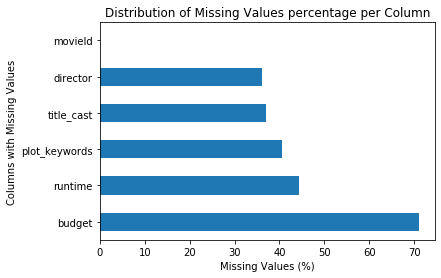

In [38]:
# The percentage of each column of missing values contained by imdb dataset
Sum = df_imdb.isnull().sum().sort_values(ascending=False)
percentage = df_imdb.isnull().sum()/df_imdb.isnull().count()*100
percentage_1 = (round(percentage, 1)).sort_values(ascending=False)
missing_values = pd.concat([Sum, percentage_1],
                         axis=1, keys=['Total', '(%) missing'])
missing_values['(%) missing'].plot(kind='barh')
plt.xlabel('Missing Values (%)')
plt.ylabel('Columns with Missing Values')
plt.title('Distribution of Missing Values percentage per Column')
plt.show()



The plot above is a visual representation of the different columns in the (`df_imdb`) dataset with their percentage of missing values.

There is a high number of movies without budget, director or title cast. Such high proportions of missing data largely disqualifies this particular set from our current modelling task.

Missing values present in the dataset can impact the performance of the model by creating a bias in the dataset. This bias can create a lack of relatability and trustworthiness in the dataset. The loss in values might contain crucial insights or information for model development.The values missing in the dataset can be missed intentionally, randomly, or missed out for a reason. So missing data is considered a problem and needs to be handled before proceeding to the next pipeline of model development.




[<a href ="#Table-of-Contents">Back to table of contents</a>]

#### Duplicates

Another thing we need to look out for are duplicates. A large amount of duplicates in the data tend to increase the bias of the estimated coefficients and standard errors of the model.**Duplicates** are an extreme case of nonrandom sampling, and they bias your fitted model. Including them will essentially lead to the model overfitting this subset of points

In [30]:
#Checking duplicate rows
duplicate_rows_df_training_dataset = merged_dataset[merged_dataset.duplicated()]
print('number of duplicate rows:', duplicate_rows_df_training_dataset)


number of duplicate rows: Empty DataFrame
Columns: [userId, movieId, rating, timestamp, title, genres]
Index: []


The number of duplicated rows is empty, indicating that there are no repeated rows in the dataset.In this case, by duplicating the dataset, you put even more pressure on predicting the most represented class and that's what it does, thus increasing accuracy.
  


### Numerical Distribution of the ratings

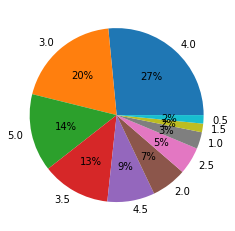

<Figure size 1440x1080 with 0 Axes>

In [6]:
train_movies=pd.merge(train,df_movies,how='left',on='movieId')
metadata=pd.merge(train_movies,df_imdb,how='left',on='movieId')

values = metadata['rating'].value_counts()/metadata.shape[0]
labels = (metadata['rating'].value_counts()/metadata.shape[0]).index
plt.pie(x=values, labels=labels, autopct='%1.0f%%', startangle=0)
plt.figure(figsize = (20,15))

plt.show()

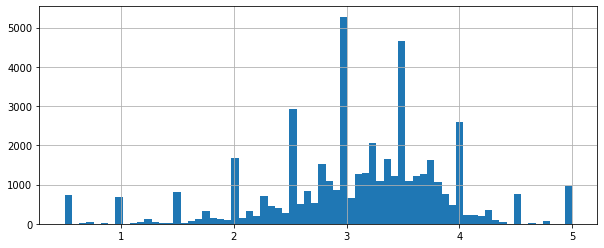

In [20]:
# plot graph of 'ratings' column
plt.figure(figsize =(10, 4))
  
x['rating'].hist(bins = 70)



#### Analysis:
- According to a study Anything higher than about a mid-3 is considered enviably high, and anything higher than a mid-3.5 is incredibly rare.Only a handful of 4s are given every year; 4.5s are reserved for best-of-the-decade or even best-of-the-genre material; The rating 5 is very rare.
- We observe a large amount of ratings  '3' and '3.5' which shows that a large number of viewers were substantially satisfied with the movies they watched. 

### Summary statistics of rating

In [20]:
#Get summary statistics for ratings
train['rating'].describe()

count    1.000004e+07
mean     3.533395e+00
std      1.061124e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

#### Descriptive statistics:
- Count is the count of a given element in a list.
- Mean is the sum of data devided by the number of data points.
- Standard deviation (std) is the number that describes how spread out the data values are.
- Minimum (min) is the lowest value of the dataset.
- Lower quartile (25%) is the median of lower half of the dataset.
- Median (50%) is the middle value of a dataset.
- Upper quartile (75%) is the median of upper half of the dataset.
- Maximum (max) is the highest value of the dataset. 



### Calculating the mean rating per movie:

In [7]:
movies_ranking = merged_dataset_3[['title','rating']].groupby('title').mean().sort_values('rating', ascending=False)
movies_ranking.head()


,rating
title,
Wrestling for Jesus: The Tale of T-Money (2011),5.0
The... Beautiful Country (1977),5.0
Only Daughter (2013),5.0
Vasermil (2007),5.0
"Day the Universe Changed, The (1985)",5.0


### Ratings vs Number of Ratings

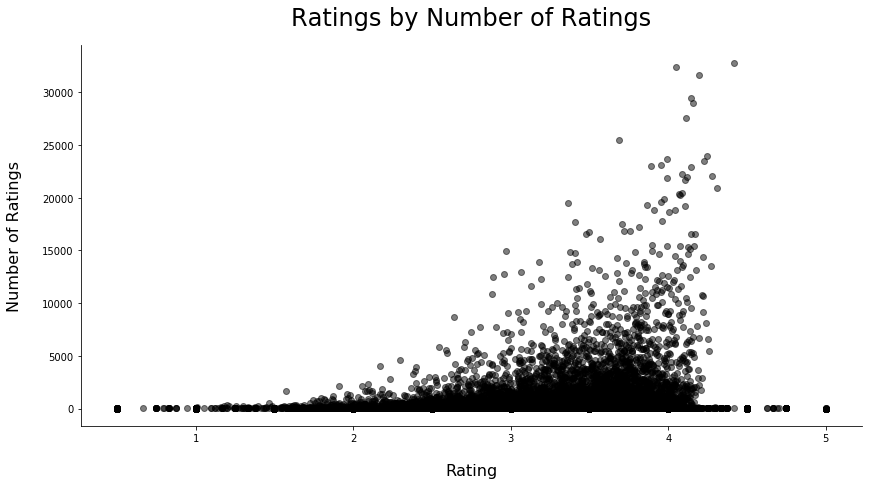

In [8]:
#create ratings dataframe
ratings_df = pd.DataFrame()

#extract average ratings
ratings_df['Mean_Rating'] = merged_dataset_3.groupby('title')['rating'].mean().values

#extract average number of ratings
ratings_df['Num_Ratings'] = merged_dataset_3.groupby('title')['rating'].count().values

#make a plot
fig, ax = plt.subplots(figsize=(14, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Ratings by Number of Ratings', fontsize=24, pad=20)
ax.set_xlabel('Rating', fontsize=16, labelpad=20)
ax.set_ylabel('Number of Ratings', fontsize=16, labelpad=20)

plt.scatter(ratings_df['Mean_Rating'], ratings_df['Num_Ratings'], alpha=0.5, color='black')

#### Observations:

The above scatterplot shows that there is a strong correlation between the number of ratings a rating-category contains and the rating category, i.e. movies that have more ratings (views) strongly tend to also have higher average ratings. This supports the previously established notion that users tend to give higher ratings in general. The plot below similarly shows that even movies with more than one hundred views (ratings) the average rating stays consistent around 3.5.


[<a href ="#Table-of-Contents">Back to table of contents</a>]

### Calculating Kurtoisis and the skewness

#### Kurtoisis:

- Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.
- Kurtosis identifies whether the tailes of a given distribution contain extreme values.

In [6]:
merged_dataset_3.kurtosis()

userId       -1.197735
movieId       2.783208
rating        0.211863
timestamp    -1.278786
runtime      18.990799
dtype: float64

#### Observations:

- From the above, we observe that all the feautures have a low kurtosis. This indicates that all the feautures have a low number of outliers.
- kurtosis is less than 3, then the dataset has lighter tails than a normal distribution (less in the tails).



#### Skewness

In [7]:
merged_dataset_3.skew()

userId       0.005744
movieId      2.000325
rating      -0.699139
timestamp    0.037635
runtime      1.656869
dtype: float64

- Positive skew (or right-skew) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.

### Observation:

- The chart above shows that most movies have a rating of 4 followed by 3 while the least rated movies were rated 0.5 and 1.5. The mean rating is around 3.5 revealing that users tend to give higher ratings to movies in general.
- We can observe that a high percentage of our movies were rated above average i.e above 3
- A low percentage were below 3

### Recommendations:
- Hence More movies are high quality perhaps people are watching movies that are recommended to them, either by their social groups or the recommender system itself.


In [9]:
#dropping duplicates on dataframe
data_1= merged_dataset_3.drop_duplicates('movieId')
#Create dataframe
num_ratings = pd.DataFrame(merged_dataset_3.groupby('movieId').count()['rating']).reset_index()
#merge num ratings with df_merge3
merged_dataset_3 = pd.merge(left=merged_dataset_3, right=num_ratings, on='movieId')
# rename columns
merged_dataset_3.rename(columns={'rating_x': 'rating', 'rating_y': 'numRatings'}, inplace=True)



In [40]:
def correlation_map( df ):
    
    """"
    This function gives a correlation map
    using all the features from merged_dataset_3.
    --------------------------------------------
    Input : dataframe column
    datatype : dataframe (integer)        
    --------------------------------------------
    output : Figure (bar graph plot)
    
    """
    # Plotting using the features
    
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })


### Correlation Analysis of Features


**Correlation Analysis** is statistical method that is used to discover if there is a relationship between two variables/ bivariet datasets, and how strong that relationship may be.


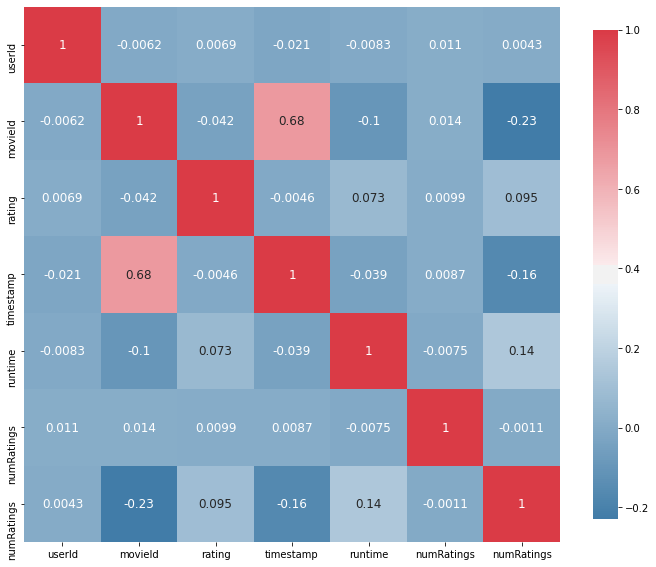

In [41]:
# Select a number of features from the dataframe to make the correlation map
correlation_map(data_1[['userId','movieId','rating', 'timestamp', 'budget','runtime', 'numRatings']])


### Observations:

Already we can see evidence of none multicollinearity between some variables.  We would have to keep a watchful eye on these relationships.

- We can obseve that there is no significant positive correlations amongst the features , aside from timestamp and movieId
- There is a very clear correlation between movieId and timestamp, reason for this it's because movies have different lengths and do not end at the exact same time.

Looking at the **Correlation coefficients** whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated. **Correlation coefficients** whose magnitude are between 0.3 and 0.5 indicate variables which have a low correlation. values from 0 to 0.25 or from 0 to -0.25 are commonly regarded to indicate the absence of correlation



## Which genres do we have?

In [13]:
df_movies['release_year']=df_movies['title'].str[-5:-1] #here we are extracting released year
df_movies['genres']=df_movies['genres'].str.split('|') # then split the genres into a list
df_movies=pd.concat([df_movies,train['rating']],axis=1).dropna() #concatinate ratings with movies dataframe



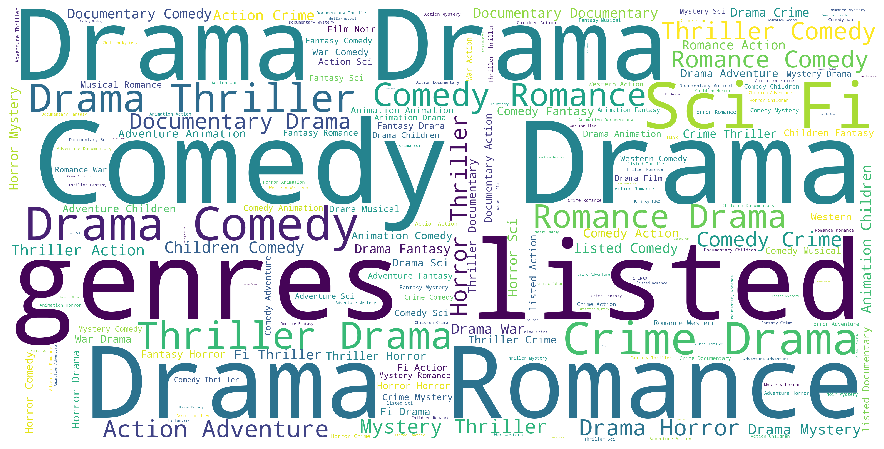

In [4]:
# Create a wordcloud of the movie genres
df_movies['genres'] = df_movies['genres'].fillna("").astype('str')
title_corpus = ' '.join(df_movies['genres'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()


- Drama, Comedy and Rpmance are the winner genres
- Seems that Sci-Fi & Adventure are not as popular

[<a href ="#Table-of-Contents">Back to table of contents</a>]

### Which Genres get best ratings?

In [16]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(df_movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head()

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


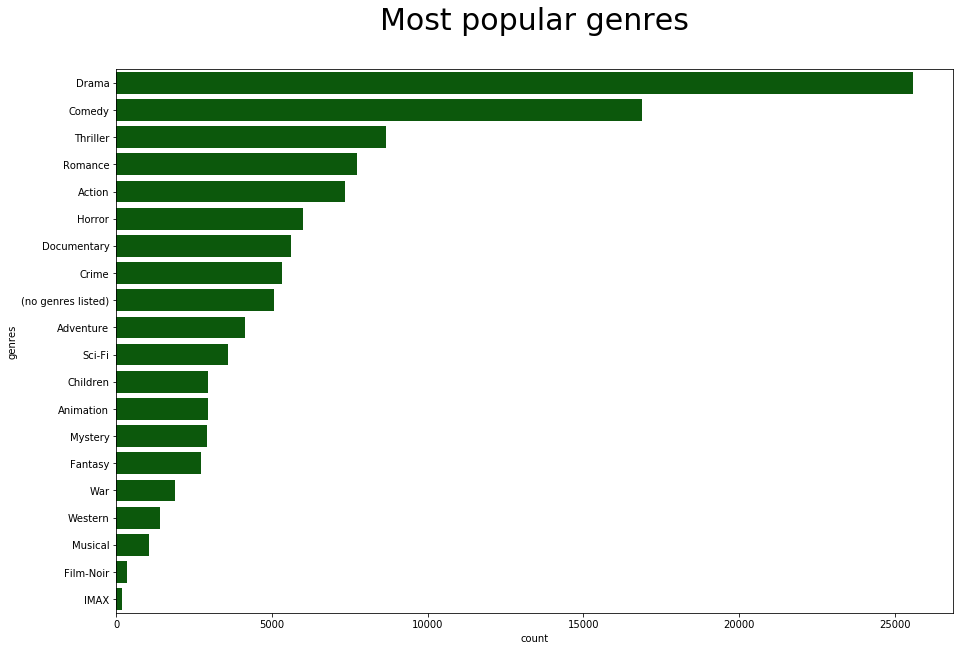

In [17]:
# Plot of genres from most popular genres
plot = plt.figure(figsize=(15, 10))
plt.title('Most popular genres\n', fontsize=30)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              color = 'darkgreen')
plt.show()


Looking at the plot above it is clear that Drama, Comedy and Thriller respectively have the highest number of ratings. Therefore we can expect that movies with a high number of ratings also have high number of viewers. 

## Which movies do we have?

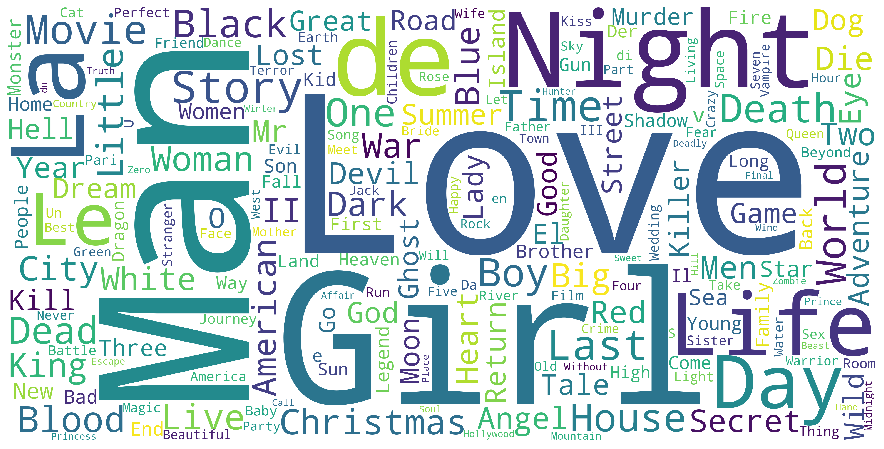

In [47]:
# Create a wordcloud of the movie titles
df_movies['title'] = df_movies['title'].fillna("").astype('str')
title_corpus = ' '.join(df_movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()


[<a href ="#Table-of-Contents">Back to table of contents</a>]

### Most Popular Movies(top 10)

In [12]:
df_movies['release_year']=df_movies['title'].str[-5:-1] #here we are extracting released year
df_movies['genres']=df_movies['genres'].str.split('|') # then split the genres into a list
df_movies=pd.concat([df_movies,train['rating']],axis=1).dropna() #concatinate ratings with movies dataframe


In [13]:
def Most_popular_movies(dataframe_1,dataframe_2):
    
    """
    A function that returns the most popular movies based on 
    the avarage ratings and the total ratings count.

    Parameters
    ----------
    
    dataframe_1: DataFrame from the train_df
    dataframe_2: DataFrame from the movies_df
    
    Returns
    -------
    
    
    Dataframe of the most popular movies.
      
    """
   
   
    rating = pd.DataFrame(dataframe_1.groupby('movieId')['rating'].mean())#Calculating avarage rating and storing the results as a DataFrame
    
    rating['ratings_count'] = pd.DataFrame(dataframe_1.groupby('movieId')['rating'].count())#Calculating total ratings count and storing the results as a DataFrame
    rating=rating.sort_values(by=['ratings_count','ratings_count'],ascending=False).reset_index()
    
    
    inner_join = pd.merge(rating,dataframe_2,on ='movieId',how ='inner')#Joining both DataFrames
    popular_movies=inner_join[['title','rating_x','ratings_count','release_year']].rename(columns={"rating_x": "rating"})
    
    return popular_movies


In [14]:
x=Most_popular_movies(train,df_movies) #display the extracted popular movies dataframe
x.head()

,title,rating,ratings_count,release_year
0,"Shawshank Redemption, The (1994)",4.417624,32831,1994
1,Forrest Gump (1994),4.047216,32383,1994
2,Pulp Fiction (1994),4.195097,31697,1994
3,"Silence of the Lambs, The (1991)",4.144172,29444,1991
4,"Matrix, The (1999)",4.154253,29014,1999


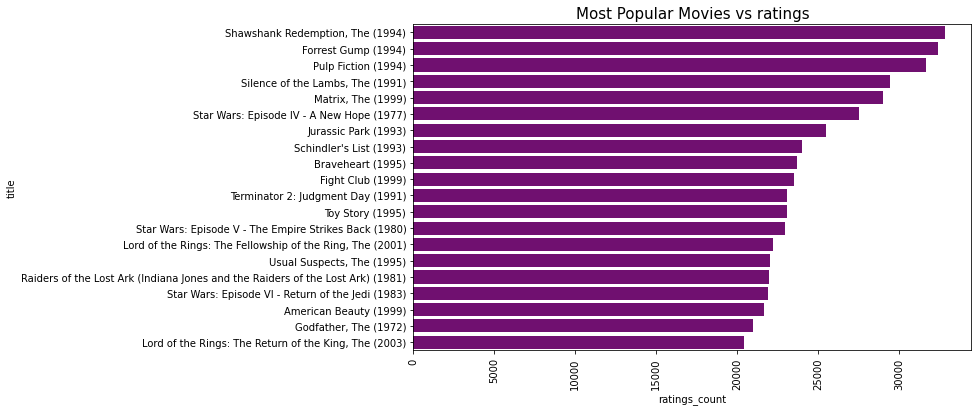

In [20]:
df=Most_popular_movies(train,df_movies)


plt.figure(figsize = (10,6))#Bar plot of most popular movies by ratings
ax=sns.barplot(y='title', x='ratings_count', data=df.head(20),color='purple')
ax.set_title('Most Popular Movies vs ratings',fontsize=15)
plt.xticks(rotation=90)
plt.show()


In a [research article](https://screenrant.com/shawshank-redemption-imdb-top-best-rated-movie-reason/) explains, Although The Shawshank Redemption is now widely considered one of the best films of all time.Moreover, movies such as science fiction and educational based movies promote creativity and improve people's experience, thereby increasing people's interests and eagerness to learn. From the plot above we see that Shawshank Redemption,Forrest Gump and Pulp Fiction are rated as the most popular movies.


In [ ]:
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

## Most Popular Movie Directors (Top 10)

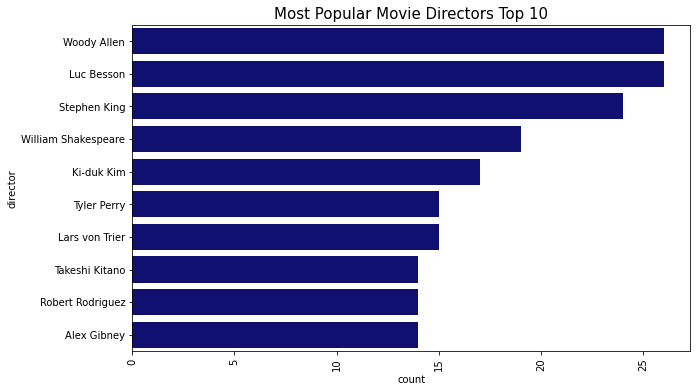

In [21]:
#Plotting top 10 movie directors using a count-plot
plt.figure(figsize = (10,6))
Movie_directors=df_imdb['director']#.explode()
axes=sns.countplot(y=Movie_directors, order = Movie_directors.value_counts().index[1:11],color='navy')
axes.set_title('Most Popular Movie Directors Top 10',fontsize=15)
plt.xticks(rotation=90)
plt.show()


Luc Besson and Woody Allen followed by Stephen King they are considered to be the most popular Movie directors. On of the reason why they are the most popular movie directors it is because they has been nominated for best director and best picture for their films.

[<a href ="#Table-of-Contents">Back to table of contents</a>]

## Most Popular Actors

In [70]:
df_imdb['title_cast']=df_imdb['title_cast'].str.split('|') #spliting the title cast into a list
df_imdb['plot_keywords']=df_imdb['plot_keywords'].str.split('|') #spliting the Key words into a list
df_imdb.head()


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgi animation]"
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,104.0,"$65,000,000","[board game, adventurer, fight, game]"
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,101.0,"$25,000,000","[boat, lake, neighbor, rivalry]"
3,4,"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,124.0,"$16,000,000","[black american, husband wife relationship, be..."
4,5,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,106.0,"$30,000,000","[fatherhood, doberman, dog, mansion]"


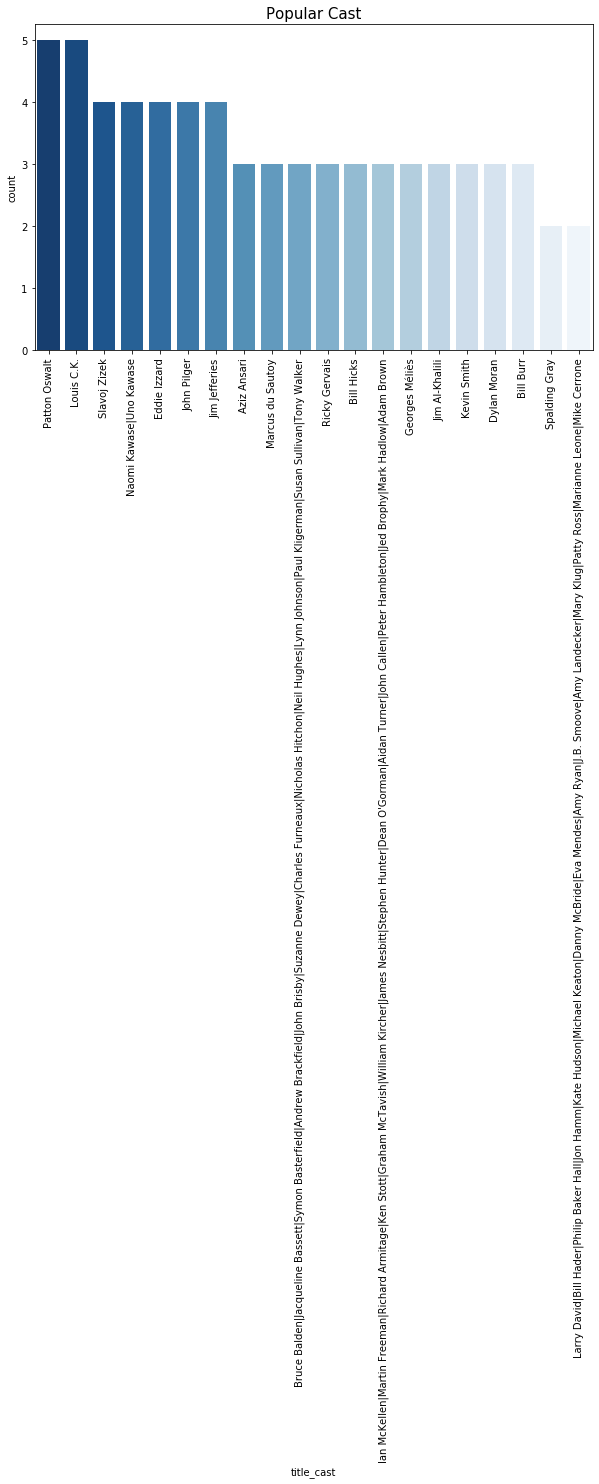

In [34]:
#Plotting popular cast using count-plot
plt.figure(figsize = (10,6))
title_cast=df_imdb['title_cast']
axes=sns.countplot(x=title_cast, order = title_cast.value_counts().index[:20],palette='Blues_r')
axes.set_title('Popular Cast',fontsize=15)
plt.xticks(rotation=90)
plt.show()


### Top Ten Longest Movies


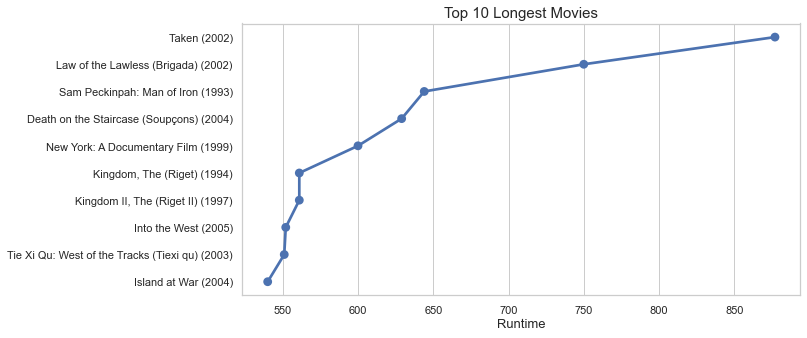

In [50]:
#top 10 Movies With Longest runtime
#sort the 'runtime' column in decending order on a new dataframe.
Sort = pd.DataFrame(data_1['runtime'].sort_values(ascending = False))
Sort['title'] = data_1['title']
data_2 = list(map(str,(Sort['title'])))

#extracting the top 10 longest duraton movies data from the dataframe.
x = list(data_2[:10])
y = list(Sort['runtime'][:10])

#Creating a plot.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Longest Movies",fontsize = 15)
ax.set_xlabel("Runtime",fontsize = 13)
sns.set_style("whitegrid")


### Observations:

- Taken is one of the most longest movies. This is because taken(2002) is a long TV mini_series, a movie and a large collection of "theatrical moments.
- Followed by law of the lawless and Man of Iron.

In [45]:
#data preprocessing
import numpy as np
import pandas as pd

# Models
from surprise import Reader, Dataset
from surprise import SVD, NormalPredictor, BaselineOnly, NMF, SlopeOne, CoClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import random

# Performance Evaluation
from surprise import accuracy
from sklearn.metrics import mean_squared_error
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split

In [2]:
df_sample_submission = pd.read_csv('sample_submission.csv')
df_movies = pd.read_csv('movies.csv')
df_imdb = pd.read_csv('imdb_data.csv')
df_genome_scores = pd.read_csv('genome_scores.csv')
df_genome_tags = pd.read_csv('genome_tags.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_tags = pd.read_csv('tags.csv')
df_links = pd.read_csv('links.csv')

In [3]:
# make a copy of the train dataset to work on
train_copy = df_train.copy()
# remove the timestamp column from the copy in order to be able to build models on train data that matches the test data
# we will evaluate the importance of the time stamp column later
train_copy = train_copy.drop('timestamp', axis = 1)
train_copy

,userId,movieId,rating
0,5163,57669,4.0
1,106343,5,4.5
2,146790,5459,5.0
3,106362,32296,2.0
4,9041,366,3.0
...,...,...,...
10000033,136395,99114,5.0
10000034,140078,553,3.0
10000035,154807,56782,4.0
10000036,85805,327,4.0


[<a href ="#Table-of-Contents">Back to table of contents</a>]

# 7. Building Models

# 7.1. Content based filtering recommender system

We will use Content based filtering to come up with 10 recommendations of a movie after the user enters a movie that they like. Therefore if a user gives us a movie that they like we will be able to predict other movies that they might also enjoy watching.

<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/KeletsoPule-dev/unsupervised-predict-streamlit-template/master/content.png"
     alt="Content"
     style="float: center; padding-bottom=0.5em"
     width=200px/>

</div>

#### Model 1 : Content Based

In [4]:
# function to preprocess data
# we use a subset of the data for computation purposes
def data_preprocessing (subset_size = 12000):
    
    # Inner join the imdb dataframe with the movies dataframe
    imdb = df_imdb[['movieId','title_cast','director', 'plot_keywords']]
    merge = imdb.merge(df_movies[['movieId', 'genres', 'title']], on='movieId', how='inner')

    # Convert data types to string in order to do string manipulation
    merge['title_cast'] = merge.title_cast.astype(str)
    merge['plot_keywords'] = merge.plot_keywords.astype(str)
    merge['genres'] = merge.genres.astype(str)
    merge['director'] = merge.director.astype(str)

    # clean directors and title_cast column
    # remove spaces and "|"
    merge['director'] = merge['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
    merge['title_cast'] = merge['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))
    merge['title_cast'] = merge['title_cast'].map(lambda x: x.split('|'))
    #convert title cast back to string and remove commas
    merge['title_cast'] = merge['title_cast'].apply(lambda x: ','.join(map(str, x)))
    merge['title_cast'] = merge['title_cast'].replace(',',' ', regex=True)
    
    # clean plot keywords column
    # remove spaces and "|"
    merge['plot_keywords'] = merge['plot_keywords'].map(lambda x: x.split('|'))
    merge['plot_keywords'] = merge['plot_keywords'].apply(lambda x: " ".join(x))

    # clean plot genres column
    # remove spaces and "|" 
    merge['genres'] = merge['genres'].map(lambda x: x.lower().split('|'))
    merge['genres'] = merge['genres'].apply(lambda x: " ".join(x))

    
    #subset table to only return required columns
    df_features = merge[['title_cast','director','plot_keywords','genres']]

    #we combine the features columns into  single string
    merge['combined_features'] = df_features['title_cast'] +' '+ df_features['director'] +' '+ df_features['plot_keywords'] +' '+ df_features['genres']
    merge_subset = merge[:subset_size]
    
    return merge_subset

In [52]:
processed_df = data_preprocessing(12000)
processed_df

,movieId,title_cast,director,plot_keywords,genres,title,combined_features
0,1,tomhanks timallen donrickles jimvarney wallace...,johnlasseter,toy rivalry cowboy cgi animation,adventure animation children comedy fantasy,Toy Story (1995),tomhanks timallen donrickles jimvarney wallace...
1,2,robinwilliams jonathanhyde kirstendunst bradle...,jonathanhensleigh,board game adventurer fight game,adventure children fantasy,Jumanji (1995),robinwilliams jonathanhyde kirstendunst bradle...
2,3,waltermatthau jacklemmon sophialoren ann-margr...,markstevenjohnson,boat lake neighbor rivalry,comedy romance,Grumpier Old Men (1995),waltermatthau jacklemmon sophialoren ann-margr...
3,4,whitneyhouston angelabassett lorettadevine lel...,terrymcmillan,black american husband wife relationship betra...,comedy drama romance,Waiting to Exhale (1995),whitneyhouston angelabassett lorettadevine lel...
4,5,stevemartin dianekeaton martinshort kimberlywi...,alberthackett,fatherhood doberman dog mansion,comedy,Father of the Bride Part II (1995),stevemartin dianekeaton martinshort kimberlywi...
...,...,...,...,...,...,...,...
11995,56702,casparzafer esthernubiola leonorwatling ingrid...,vicentearanda,15th century 1400s year 1401 constantinople,adventure,"Maidens' Conspiracy, The (Tirante el Blanco) (...",casparzafer esthernubiola leonorwatling ingrid...
11996,56715,willarnett abrahambenrubi lesliebibb markboone...,gorandukic,suicide hitchhiker afterlife road trip,drama fantasy romance,Wristcutters: A Love Story (2006),willarnett abrahambenrubi lesliebibb markboone...
11997,56719,fabrizioborsani teogheorghiu julikajenkins urs...,peterluisi,prodigy deception falling out a window airplane,drama,Vitus (2006),fabrizioborsani teogheorghiu julikajenkins urs...
11998,56744,leeboardman jimbroadbent tamdeanburn lindsaydu...,petermorgan,character name as title murder of a child pris...,crime drama,Longford (2006),leeboardman jimbroadbent tamdeanburn lindsaydu...


In [7]:
#Create a count vectorizer to use in our model
cv = CountVectorizer()
cv_model = cv.fit_transform(processed_df['combined_features'])

In [59]:
def content_test(movie_list,top_n=10):
    """Performs Content filtering based upon a list of movies supplied
       by the app user.

    Parameters
    ----------
    movie_list : list (str)
        Favorite movies chosen by the app user.
    top_n : type
        Number of top recommendations to return to the user.

    Returns
    -------
    list (str)
        Titles of the top-n movie recommendations to the user.

    """
    # Initializing the empty list of recommended movies
    processed_df = data_preprocessing(12000)
    # Instantiating and generating the count matrix
    cv = CountVectorizer()
    cv_model = cv.fit_transform(processed_df['combined_features'])
    indices = pd.DataFrame(processed_df.index)
    cosine_sim = cosine_similarity(cv_model, cv_model)
    # Getting the index of the movie that matches the title
    idx_1 = indices[indices == movie_list[0]].index[0]
    idx_2 = indices[indices == movie_list[1]].index[0]
    idx_3 = indices[indices == movie_list[2]].index[0]
    # Creating a Series with the similarity scores in descending order
    rank_1 = cosine_sim[idx_1]
    rank_2 = cosine_sim[idx_2]
    rank_3 = cosine_sim[idx_3]
    # Calculating the scores
    score_series_1 = pd.Series(rank_1).sort_values(ascending = False)
    score_series_2 = pd.Series(rank_2).sort_values(ascending = False)
    score_series_3 = pd.Series(rank_3).sort_values(ascending = False)
    # Getting the indexes of the 10 most similar movies
    listings = score_series_1.append(score_series_1).append(score_series_3).sort_values(ascending = False)

    # Store movie names
    recommended_movies = []
    # Appending the names of movies
    top_50_indexes = list(listings.iloc[1:50].index)
    # Removing chosen movies
    top_indexes = np.setdiff1d(top_50_indexes,[idx_1,idx_2,idx_3])
    for i in top_indexes[:top_n]:
        recommended_movies.append(list(df_movies['title'])[i])
    return recommended_movies

In [60]:
movie_list = ['Toy Story 2 (1999)',
 'DuckTales: The Movie - Treasure of the Lost Lamp (1990)',
 "Twelve Tasks of Asterix, The (Les douze travaux d'Astérix) (1976)"]
content_test(movie_list,10)

['Wallace & Gromit: The Wrong Trousers (1993)',
 'Barefoot Executive, The (1971)',
 'Indiana Jones and the Temple of Doom (1984)',
 'Dark Crystal, The (1982)',
 'RoboCop 2 (1990)',
 'End of Days (1999)',
 'The Lair of the White Worm (1988)',
 'Domestic Disturbance (2001)',
 'Spring, Summer, Fall, Winter... and Spring (Bom yeoreum gaeul gyeoul geurigo bom) (2003)',
 'Americathon (1979)']

In [53]:
#function to obtain recommendations
def content_model(title,n):
    '''
    title: title that user will enter
    n: the number of recommendations required
    cv_matrix: unpickled countvecorizer
    
    '''
    cv = CountVectorizer()
    cv_model = cv.fit_transform(processed_df['combined_features'])
    #set title column as the index and create a dataframe of titles
    processed_df.set_index('title', inplace = True)
    indices = pd.DataFrame(processed_df.index)
    #create the cosine similarity matrix using the count vectorizer
    sim_score = cosine_similarity(cv_model,cv_model)
    
    #create an empty list of the recommended movies
    recommended_movies = []
    
    # match the entered title to its index in the titles dataframe
    idx = indices[indices == title].index[0]

    # get the similarity scores from highest to lowest
    score_series = pd.Series(sim_score[idx]).sort_values(ascending = False)

    # create a list of the top nth title indexes from the similarity matrix
    top_n_indexes = list(score_series.iloc[1:n+1].index)
    
    # add the titles that match the indexes to the list
    for i in top_n_indexes:
        recommended_movies.append(list(processed_df.index)[i])
        
    return recommended_movies

In [54]:
content_model('Toy Story 2 (1999)', 10)

['Toy Story 2 (1999)',
 'DuckTales: The Movie - Treasure of the Lost Lamp (1990)',
 "Twelve Tasks of Asterix, The (Les douze travaux d'Astérix) (1976)",
 'Chipmunk Adventure, The (1987)',
 'Wallace & Gromit: The Wrong Trousers (1993)',
 "Happily N'Ever After (2007)",
 'Who Framed Roger Rabbit? (1988)',
 'Wonderful World of the Brothers Grimm, The (1962)',
 'Monsters, Inc. (2001)',
 'Tekkonkinkreet (Tekkon kinkurîto) (2006)']

[<a href ="#Table-of-Contents">Back to table of contents</a>]

In [62]:
#Load the data using the surprise package
train_df_subset = train_copy[:100000] # use a subset of the data in order to make it easier to compute

In [63]:
reader = Reader(rating_scale=(0.5, 5))

In [64]:
train_subset_data = Dataset.load_from_df(train_df_subset[['userId', 'movieId', 'rating']], reader)

In [65]:
Train, test = train_test_split(train_subset_data, test_size=.25, random_state=42)

# 7.2. SVD Model
 Singular value decomposition (SVD) is a method of representing a matrix as a series of linear approximations that expose the underlying meaning-structure of the matrix. The goal of SVD is to find the optimal set of factors that best predict the outcome.

In [66]:
svd = SVD(random_state=42)
svd.fit(Train)
predictions = svd.test(test)
# Calculate RMSE
svd_rmse = accuracy.rmse(predictions)

RMSE: 0.9827


[<a href ="#Table-of-Contents">Back to table of contents</a>]

# 7.3. BaselineOnly Model
 A baseline is a method that uses heuristics, simple summary statistics, randomness, or machine learning to create predictions for a dataset.

In [67]:
blo = BaselineOnly()
blo.fit(Train)
predictions = blo.test(test)
# Calculate RMSE
blo_rmse = accuracy.rmse(predictions)

Estimating biases using als...
RMSE: 0.9843


[<a href ="#Table-of-Contents">Back to table of contents</a>]

# 7.4. NMF Non negative Matrix Factorization Model
 Non-negative matrix factorization (NMF or NNMF), also non-negative matrix approximation is a group of algorithms in multivariate analysis and linear algebra where a matrix V is factorized into (usually) two matrices W and H, with the property that all three matrices have no negative elements.

In [68]:
nmf = NMF()
nmf.fit(Train)
predictions = nmf.test(test)
# Calculate RMSE
nmf_rmse = accuracy.rmse(predictions)

RMSE: 1.1620


[<a href ="#Table-of-Contents">Back to table of contents</a>]

# 7.5. SlopeOne

In [69]:
so = SlopeOne()
so.fit(Train)
predictions = so.test(test)
# Calculate RMSE
so_rmse = accuracy.rmse(predictions)

RMSE: 1.1598


[<a href ="#Table-of-Contents">Back to table of contents</a>]

# 7.6. Co-Clustering
 Biclustering, block clustering, co-clustering, or two-mode clustering is a data mining technique which allows simultaneous clustering of the rows and columns of a matrix.

In [70]:
cc = CoClustering(random_state=42)
cc.fit(Train)
predictions = cc.test(test)
# Calculate RMSE
cc_rmse = accuracy.rmse(predictions)

RMSE: 1.1514


[<a href ="#Table-of-Contents">Back to table of contents</a>]

# SVD Model - Was the one submitted on Kaggle.

# 7.7. Hyper parametertuning on best models (SVD)
  We used Hyper parameter tuning on SVD Model to control the learning process so that we can better our model.

In [71]:
params = {'n_epochs':[40], 
              'n_factors':[400], 
              'init_std_dev':[0.005], 
              'random_state':[42]} 
grids_svd = GridSearchCV(SVD, cv=5, measures=['rmse'], param_grid=params, n_jobs=-1)
grids_svd.fit(train_subset_data)
print(grids_svd.best_score['rmse'])
print(grids_svd.best_params['rmse'])

0.9674199430090038
{'n_epochs': 40, 'n_factors': 400, 'init_std_dev': 0.005, 'random_state': 42}


In [72]:
# apply tuning to the svd model 
svd_tuned = SVD(n_epochs = 40, n_factors = 400, init_std_dev = 0.005, random_state=42)
svd_tuned.fit(Train)
predictions = svd_tuned.test(test)
# Calculate RMSE
svd_tuned_rmse = accuracy.rmse(predictions)

RMSE: 0.9734


[<a href ="#Table-of-Contents">Back to table of contents</a>]

#### Train the best model with the full dataset

Note!!! This process takes up a lot of computational power to run due to our dataset being so large.

In [16]:
#Load the data using the surprise package
reader = Reader(rating_scale=(0.5, 5))
train_data = Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader)
train_dataset = train_data.build_full_trainset()

In [17]:
# apply tuning to the svd model 
svd_tuned = SVD(n_epochs = 40, n_factors = 400, init_std_dev = 0.005, random_state=42)
svd_tuned.fit(train_dataset)

In [19]:
#apply trained model to test data
predictions=[svd_tuned.predict(row.userId, row.movieId) for _,row in df_test.iterrows()]

In [20]:
df_pred = pd.DataFrame(predictions)
df_pred

,uid,iid,r_ui,est,details
0,1,2011,None,3.063302,{'was_impossible': False}
1,1,4144,None,4.186689,{'was_impossible': False}
2,1,5767,None,3.769391,{'was_impossible': False}
3,1,6711,None,4.125384,{'was_impossible': False}
4,1,7318,None,2.980803,{'was_impossible': False}
...,...,...,...,...,...
5000014,162541,4079,None,3.450257,{'was_impossible': False}
5000015,162541,4467,None,3.862251,{'was_impossible': False}
5000016,162541,4980,None,2.707757,{'was_impossible': False}
5000017,162541,5689,None,2.852821,{'was_impossible': False}


In [21]:
# Renaming our predictions to original names
df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})


In [22]:
# Drop the columns not required for the submission
df_pred.drop(['r_ui','details'],axis=1,inplace=True)

In [23]:
# Concatenating userId/movieId into a single Id column.(code has to be run twice to get desired outcome)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)


In [24]:
# Drop the features that will not be required for the submission
df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)
#Change positioning of columns
df_pred = df_pred[['Id', 'rating']]
# Create Submission file
df_pred.to_csv("svd_tuned_googlecloud1.csv", index=False)
df_pred

,Id,rating
0,1_2011,3.063302
1,1_4144,4.186689
2,1_5767,3.769391
3,1_6711,4.125384
4,1_7318,2.980803
...,...,...
5000014,162541_4079,3.450257
5000015,162541_4467,3.862251
5000016,162541_4980,2.707757
5000017,162541_5689,2.852821


[<a href ="#Table-of-Contents">Back to table of contents</a>]

# 7.8. Collaborative based recommender
We will use Collaborative based filtering to come up with ratings predictions based on the UserID and MovieID. Therefore    we will be able to predict what the user will rate a movie based on the User and the Movie.


<div align="center" style="width: 600px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/KeletsoPule-dev/unsupervised-predict-streamlit-template/master/collaborative.png"
     alt="Collab"
     style="float: center; padding-bottom=0.5em"
     width=300px/>

</div>

rydftyftftygyg

In [39]:
# Data Preprocessing
movietitle = pd.merge(df_train,df_movies, on= 'movieId', how = 'left')
movietitle = movietitle.drop(['genres','rating','userId','timestamp'], axis = 1)
movietitle = movietitle.drop_duplicates()
movietitle = movietitle.dropna()

In [12]:
#Build a model usind svd
svd = SVD(n_epochs = 40, n_factors = 400, init_std_dev = 0.005, random_state=42)
svd.fit(a_train)


In [14]:
#pickle the model for use later
import pickle

model_save_path = "tunedSVD_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(svd,file)

In [40]:
def prediction_item(item_id):
    
    # load a subset of the data
    train_subset = train_copy[:100000]
    reader = Reader(rating_scale=(0, 5))
    load_df = Dataset.load_from_df(train_subset[['userId','movieId','rating']],reader)
    a_train = load_df.build_full_trainset()

    predictions = []
    for ui in a_train.all_users():
        predictions.append(svd.predict(iid=item_id,uid=ui, verbose = False))
    return predictions

In [41]:
def pred_movies(movie_list):
  
    # Store the id of users
    id_store=[]
    # For each movie selected by a user of the app,
    # predict a corresponding user within the dataset with the highest rating
    for i in movie_list:
        predictions = prediction_item(item_id = i)
        predictions.sort(key=lambda x: x.est, reverse=True)
        # Take the top 10 user id's from each movie with highest rankings
        for pred in predictions[:10]:
            id_store.append(pred.uid)
    # Return a list of user id's
    return id_store

In [43]:
def collab_model(movie_list,top_n=10):

    # indices1 = pd.Series(movies['title'])
    movie_ids = pred_movies(movie_list)
    df_init_users = train_subset[train_subset['userId']==movie_ids[0]]
    for i in movie_ids[1:]:
        df_init_users=df_init_users.append(train_subset[train_subset['userId']==i])
        
    # Getting the user-item matrix
    df_init_users = pd.merge(df_init_users, movietitle, on = 'movieId', how = 'left')
    df_init_users = df_init_users.dropna()
    users_matrix = df_init_users.groupby(['title','userId'])['rating'].max().unstack()
    for i in movie_list:
        if i not in users_matrix.index.values.tolist():
            df_nan = pd.DataFrame([[(np.NaN)]*len(users_matrix.columns)], index = [i], columns = users_matrix.columns)
            users_matrix = users_matrix.append(df_nan)
            
    # Getting the cosine similarity matrix
    cosine_sim = cosine_similarity(users_matrix.fillna(0))
    indices = pd.Series(users_matrix.index)
    idx_1 = indices[indices == movie_list[0]].index[0]
    idx_2 = indices[indices == movie_list[1]].index[0]
    idx_3 = indices[indices == movie_list[2]].index[0]
    
    # Creating a Series with the similarity scores in descending order
    rank_1 = cosine_sim[idx_1]
    rank_2 = cosine_sim[idx_2]
    rank_3 = cosine_sim[idx_3]
    
    # Calculating the scores
    score_series_1 = pd.Series(rank_1).sort_values(ascending = False)
    score_series_2 = pd.Series(rank_2).sort_values(ascending = False)
    score_series_3 = pd.Series(rank_3).sort_values(ascending = False)
    
    # Appending the names of movies
    listings = score_series_1.append(score_series_2).append(score_series_3).sort_values(ascending = False)
    recommended_movies = []
    
    # Choose top 50
    top_50_indx = list(listings.iloc[1:50].index)
    
    # Removing chosen movies
    top_indx = np.setdiff1d(top_50_indx,[idx_1,idx_2,idx_3])
    random.shuffle(top_indx)
    for j in top_indx[:top_n]:
        recommended_movies.append(indices[j])
        
    return recommended_movies

In [46]:
collab_model(movie_list, 10)

['21 (2008)',
 'Commando (1985)',
 'Self/less (2015)',
 'Prisoners (2013)',
 'Harry Potter and the Chamber of Secrets (2002)',
 'Gunga Din (1939)',
 'Christmas Carol, A (2009)',
 'Shutter Island (2010)',
 'Batman Forever (1995)',
 'Cure (1997)']

# 8. Conclusion

[<a href ="#Table-of-Contents">Back to table of contents</a>]